In [67]:
import pickle
import torch
from itertools import product
import pandas as pd
import numpy as np
from stewart_intro.utils import project_dir
from stewart_intro.generate_training_data import normalize_data
from stewart_intro.simple_nn import (
    get_formatted_training_data_from_batch,
    predict,
)
from matplotlib import pyplot as plt


def load_nn():
    with open(
            project_dir +
            'stewart_intro/models/' +
            'simple_nn_99_batch_size_50000_iters.pkl', 'rb') as f:
        model = pickle.load(f)
    return model


def plot_prognostic_predictions(w1, w2, data):
    x = data.x.values[30]
    y = data.y.values[30]
    time_steps = 100
    time = data.time.values[100]
    point = pd.DataFrame([[x, y, time]], columns=['x', 'y', 'time'])
    x_data, target, fqts_fslis, true_states = \
        get_formatted_training_data_from_batch(
            data,
            point,
            n_time_steps=time_steps)
    true_states = np.stack(true_states.detach().numpy())[:, 0, :]
    to_predict_from = x_data
    qt_estimates = []
    sli_estimates = []
    qt_true = true_states[:, :34]
    sli_true = true_states[:, 34:]
    for _ in range(time_steps):
        prediction = predict(w1, w2, 1, to_predict_from, fqts_fslis)
        qt_estimates.append(prediction.detach().numpy()[0][:34])
        sli_estimates.append(prediction.detach().numpy()[0][34:])
        to_predict_from = torch.transpose(torch.cat(
            (
                torch.transpose(prediction, 0, 1),
                torch.transpose(x_data[:, -3:], 0, 1),
            )
        ), 0, 1)
    qt_estimates = np.stack(qt_estimates)
    sli_estimates = np.stack(sli_estimates)
    plt.contourf(qt_true.T)
    plt.colorbar()
    plt.title('True Normalized QT')
    plt.xlabel('Time')
    plt.ylabel('Z')
    plt.show()
    plt.contourf(qt_estimates.T)
    plt.colorbar()
    plt.title('Predicted Normalized QT')
    plt.xlabel('Time')
    plt.ylabel('Z')
    plt.show()
    plt.contourf(sli_true.T)
    plt.colorbar()
    plt.title('True Normalized SLI')
    plt.xlabel('Time')
    plt.ylabel('Z')
    plt.show()
    plt.contourf(sli_estimates.T)
    plt.colorbar()
    plt.title('Predicted Normalized SLI')
    plt.xlabel('Time')
    plt.ylabel('Z')
    plt.show()

In [2]:
data = normalize_data()

In [68]:
w1, w2 = load_nn()

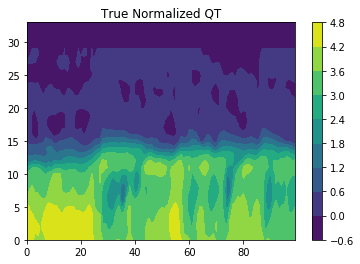

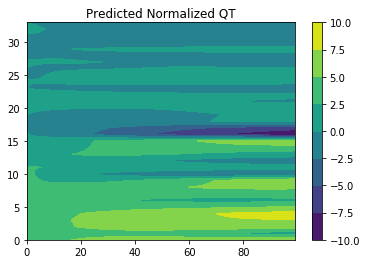

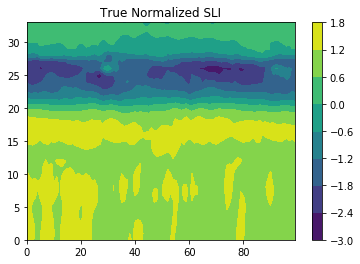

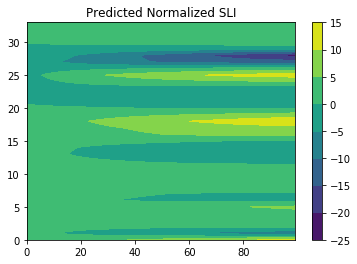

In [69]:
plot_predictions(w1, w2, data)

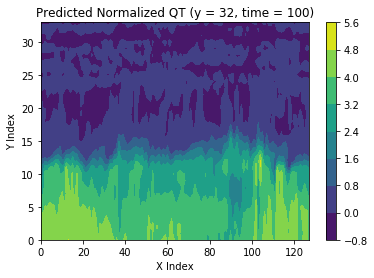

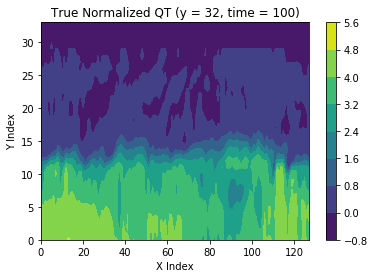

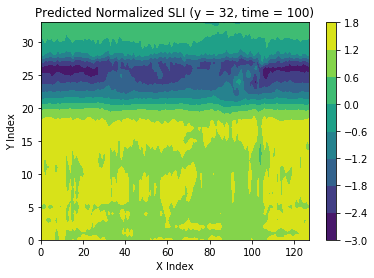

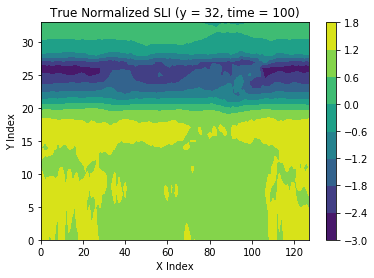

In [65]:
time = data.time.values[100]
y = data.y.values[32]
batch = pd.DataFrame(
        [[val, y, time] for val in data.x.values],
        columns=['x', 'y', 'time']
    )
x_data, target, fqts_fslis, true_states = \
    get_formatted_training_data_from_batch(
        data,
        batch,
        n_time_steps=1)
prediction = predict(w1, w2, 1, x_data, fqts_fslis)
predicted_qt = prediction.detach().numpy()[:, :34]
predicted_sli = prediction.detach().numpy()[:, 34:]
plt.contourf(predicted_qt.T)
plt.colorbar()
plt.title('Predicted Normalized QT (y = 32, time = 100)')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.show()
plt.contourf(target.detach().numpy()[:, :34].T)
plt.colorbar()
plt.title('True Normalized QT (y = 32, time = 100)')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.show()

plt.contourf(predicted_sli.T)
plt.colorbar()
plt.title('Predicted Normalized SLI (y = 32, time = 100)')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.show()
plt.contourf(target.detach().numpy()[:, 34:].T)
plt.colorbar()
plt.title('True Normalized SLI (y = 32, time = 100)')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.show()

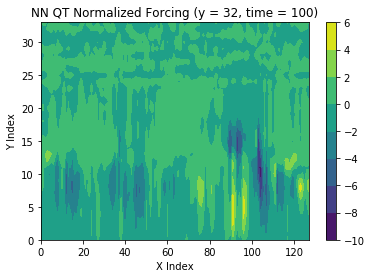

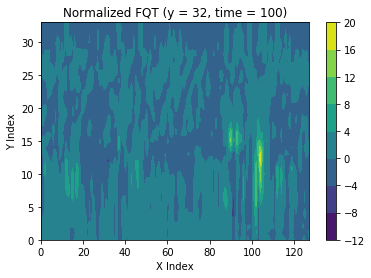

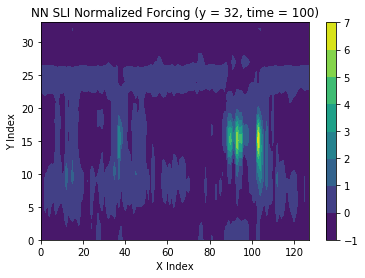

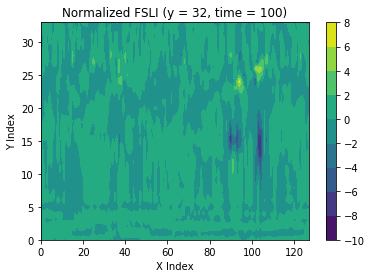

In [77]:
time = data.time.values[100]
y = data.y.values[32]
batch = pd.DataFrame(
        [[val, y, time] for val in data.x.values],
        columns=['x', 'y', 'time']
    )
x_data, target, fqts_fslis, true_states = \
    get_formatted_training_data_from_batch(
        data,
        batch,
        n_time_steps=1)

layer_one_out = F.relu(x_data.matmul(w1))
nn_output = layer_one_out.matmul(w2)
nn_qt_forcing = nn_output.detach().numpy()[:, :34]
nn_sli_forcing = nn_output.detach().numpy()[:, 34:]
plt.contourf(nn_qt_forcing.T)
plt.colorbar()
plt.title('NN QT Normalized Forcing (y = 32, time = 100)')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.show()
plt.contourf(fqts_fslis.detach().numpy()[0][:, :34].T)
plt.colorbar()
plt.title('Normalized FQT (y = 32, time = 100)')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.show()

plt.contourf(nn_sli_forcing.T)
plt.colorbar()
plt.title('NN SLI Normalized Forcing (y = 32, time = 100)')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.show()
plt.contourf(fqts_fslis.detach().numpy()[0][:, 34:].T)
plt.colorbar()
plt.title('Normalized FSLI (y = 32, time = 100)')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.show()

In [76]:
fqts_fslis.detach().numpy()[0].shape

(128, 68)